In [14]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingRegressor


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import numpy as np
import sklearn.model_selection
import hyperopt
from sklearn.metrics import accuracy_score
import xgboost as xgb


!pip install scikit-optimize
from skopt import BayesSearchCV



In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


SEX
female - 0
male - 1

SMOKER
no - 0
yes - 1

REGION
0 - southwest
1 - southeast
2 - northwest

In [4]:
smoker_map = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker_map)

region_map = {'northwest': 2, 'southeast': 1,  'southwest': 0}
df['region'] = df['region'].map(region_map)

sex_map = {'male': 1, 'female': 0}
df['sex'] = df['sex'].map(sex_map)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0.0,16884.92400
1,18,1,33.770,1,0,1.0,1725.55230
2,28,1,33.000,3,0,1.0,4449.46200
3,33,1,22.705,0,0,2.0,21984.47061
4,32,1,28.880,0,0,2.0,3866.85520


In [5]:
X=df.copy().drop('charges', axis=1)
y=df['charges'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

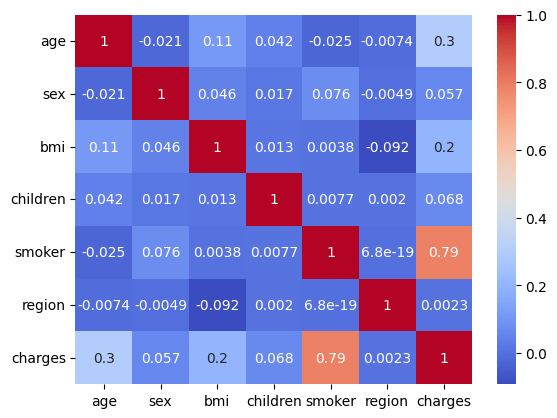

In [6]:
# Wyliczenie korelacji między zmiennymi
corr = df.corr()

# Narysowanie macierzy korelacji
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [7]:
df_xgbt = df
df_xgbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1014 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape

(1070, 6)

In [9]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [10]:


# Tworzenie i trenowanie modelu XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Predykcja wartości na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie miary skuteczności modelu, np. średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)

In [11]:
y_pred

array([ 9559.651  ,  8986.03   , 33174.59   ,  8803.886  , 33926.418  ,
        7528.5483 ,   631.40625, 15347.004  ,  3303.0806 , 11598.128  ,
       19488.354  , 10451.091  ,  4509.271  , 44630.266  , 48027.98   ,
       43803.816  , 10179.69   , 43648.32   ,  9159.566  , 25129.535  ,
        4749.6685 ,  8363.729  ,  1210.0103 ,  2909.254  , 10707.319  ,
       12737.663  , 14747.254  ,  5672.958  , 10178.886  ,  4293.388  ,
        6914.021  , 14374.554  ,  2368.836  ,  5619.2603 ,  6202.496  ,
       10109.515  ,  3245.2437 ,  6995.8257 , 23446.107  , 39023.926  ,
        3330.095  ,  5627.808  , 12964.617  , 16492.594  ,  6074.5337 ,
       11463.897  , 15930.609  ,  7291.6436 , 42019.96   ,  8212.225  ,
       13852.694  ,   903.31885,  5255.464  ,  1821.0879 , 12007.382  ,
        9603.575  ,  2808.0784 , 44926.8    , 11586.454  , 14191.506  ,
       15829.749  ,  3748.5913 , 18457.223  , 10546.661  , 11538.218  ,
        7852.888  , 16542.854  , 12374.755  ,  3239.3645 ,  1692

In [12]:
mse

25502130.677695915

In [33]:
print(model.feature_importances_)

[0.01551622 0.00481571 0.02301165 0.00725031 0.9424342  0.00697189]


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


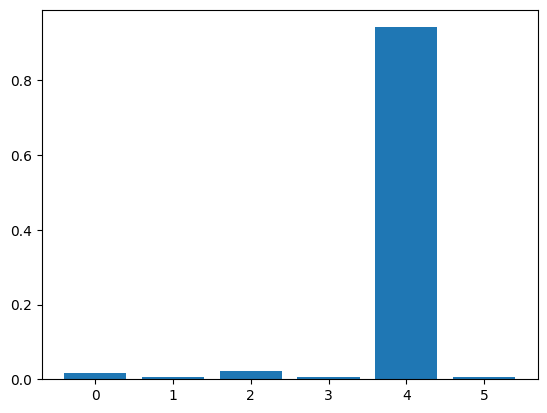

In [35]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mae

2839.0064147183125

In [40]:
from sklearn.metrics import mean_squared_log_error

In [43]:
from sklearn.metrics import r2_score

In [45]:
r2=r2_score(y_test, y_pred)
r2

0.8357337259206704

In [53]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2_SCORE: {r2}")

MSE: 25502130.677695915
MAE: 2839.0064147183125
R2_SCORE: 0.8357337259206704
